Sklearn

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn import preprocessing
import process_csv_data
import betting
import numpy as np
import csv
import os
import struct

In [2]:
def slice_the_set(df,start,end):

    start = int(len(df)*start/100)
    end = int(len(df)*end/100)

    return df.iloc[start:end]

In [3]:
df = pd.read_csv('../data/sliding01.csv')
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df_train = slice_the_set(df,0,80)
df_test = slice_the_set(df,80,100)

df_train

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,2,1.36,4.50,9.00,5,3,2,14,10,2,2,6,8,14
1,1,1,2.25,3.00,3.50,3,4,3,16,12,4,3,3,14,12
2,2,1,2.80,3.00,2.70,5,2,3,10,8,4,4,2,15,13
3,3,0,1.91,3.25,4.33,5,3,2,18,11,3,3,4,10,11
4,4,2,2.10,3.00,4.00,2,4,4,6,9,1,6,3,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16653,2,1.44,4.50,6.50,4,2,4,17,12,1,2,7,6,21
16654,16654,2,1.29,5.75,8.50,4,4,2,15,15,0,2,8,5,28
16655,16655,1,2.55,3.50,2.60,2,4,4,12,19,4,2,4,16,15
16656,16656,0,3.10,3.60,2.15,3,5,2,21,13,9,1,0,29,7


In [4]:
y_train  = df_train['result']
X_train= df_train.iloc[:,2:-1]
y_test = df_test['result']
X_test = df_test.iloc[:,2:-1]

In [5]:
from scipy.special import softmax

In [6]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(100,1000,3),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

nn.out_activation_ = 'softmax'

In [7]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.06491051
Iteration 2, loss = 1.06302317
Iteration 3, loss = 1.06294267
Iteration 4, loss = 1.06287571
Iteration 5, loss = 1.06278599
Iteration 6, loss = 1.06271484
Iteration 7, loss = 1.06268781
Iteration 8, loss = 1.06252922
Iteration 9, loss = 1.06253426
Iteration 10, loss = 1.06241932
Iteration 11, loss = 1.06235451
Iteration 12, loss = 1.06218709
Iteration 13, loss = 1.06219854
Iteration 14, loss = 1.06201268
Iteration 15, loss = 1.06197346
Iteration 16, loss = 1.06183915
Iteration 17, loss = 1.06167109
Iteration 18, loss = 1.06154879
Iteration 19, loss = 1.06133262
Iteration 20, loss = 1.06119256
Iteration 21, loss = 1.06094258
Iteration 22, loss = 1.06069234
Iteration 23, loss = 1.06045405
Iteration 24, loss = 1.06002094
Iteration 25, loss = 1.05975591
Iteration 26, loss = 1.05933183
Iteration 27, loss = 1.05883045
Iteration 28, loss = 1.05822582
Iteration 29, loss = 1.05767249
Iteration 30, loss = 1.05688345
Iteration 31, loss = 1.05614807
Iteration 32, los

In [8]:
print('It took {} to train the neural network'.format(end-start))

It took 0:04:42.288503 to train the neural network


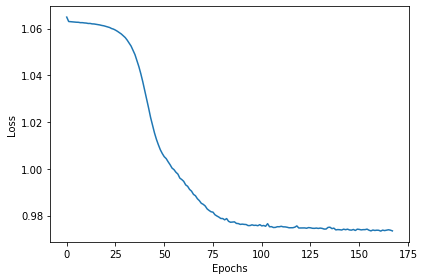

In [9]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [10]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 52.32%
